In [44]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [45]:
inventory_price = pd.read_csv("Data_OTT/inventory_2.csv")

In [46]:
inventory_price.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1


In [47]:
inventory_price  = inventory_price.drop("Unnamed: 0", axis=1)

In [48]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

In [49]:
inventory_price.isnull().sum()

item_id               0
contract_year         0
movie_id              0
title                 0
price                 0
release_year          0
release_date          0
runtime               0
mpa_rating            0
mpa_rating_origin     0
imdb_score            0
votes                 0
reviews_users         0
reviews_critics       0
budget                0
income_usa            0
income_ww             0
theater_opening       0
theater_total         0
country_1             0
country_2            67
country_3            92
studio                0
director              0
Genre_1               0
Genre_2               3
Genre_3              10
actor_1               0
actor_2               0
actor_3               0
contract_price        0
studio_score          0
price_class           0
dtype: int64

In [50]:
inventory_price = inventory_price.drop(["country_2", "country_3"], axis = 1)

In [51]:
inventory_price = inventory_price.fillna("ETC")

In [52]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

- 상영 극장수 수정

<AxesSubplot:>

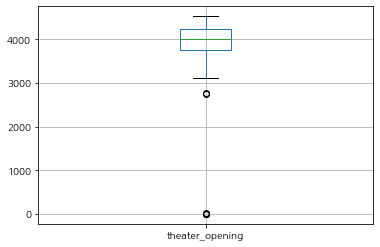

In [53]:
inventory_price[["theater_opening"]].boxplot()

In [54]:
# 인벤토리, 가격, 전처리
inventory_price.to_csv("movie_inventory_price")

## 고객 데이터 불러오기

In [55]:
customers = pd.read_csv("Data_OTT/movie_customer.csv", encoding="cp949")

In [56]:
customers.shape

(3277, 8)

In [57]:
download = pd.read_csv("Data_OTT/movie_down.csv")

In [58]:
download

,customer_id,item_id,down_date,down_year,down_month,down_weekday
0,C5001,I-1038,2015-01-08,2015,2015M01,Thu
1,C5001,I-1003,2015-01-17,2015,2015M01,Sat
2,C5001,I-1017,2015-01-17,2015,2015M01,Sat
3,C5001,I-1028,2015-01-19,2015,2015M01,Mon
4,C5001,I-1036,2015-01-20,2015,2015M01,Tue
...,...,...,...,...,...,...
116459,C8277,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,I-1091,2018-10-25,2018,2018M10,Thu


In [59]:
cust_down = pd.merge(customers, download, on='customer_id')

In [60]:
cust_down.tail(10)

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,item_id,down_date,down_year,down_month,down_weekday
116454,C8277,M,37,30대,S,N,강남구,2018,I-1070,2018-01-26,2018,2018M01,Fri
116455,C8277,M,37,30대,S,N,강남구,2018,I-1093,2018-05-08,2018,2018M05,Tue
116456,C8277,M,37,30대,S,N,강남구,2018,I-1052,2018-05-27,2018,2018M05,Sun
116457,C8277,M,37,30대,S,N,강남구,2018,I-1017,2018-06-15,2018,2018M06,Fri
116458,C8277,M,37,30대,S,N,강남구,2018,I-1086,2018-08-17,2018,2018M08,Fri
116459,C8277,M,37,30대,S,N,강남구,2018,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,M,37,30대,S,N,강남구,2018,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,M,37,30대,S,N,강남구,2018,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,M,37,30대,S,N,강남구,2018,I-1091,2018-10-25,2018,2018M10,Thu
116463,C8277,M,37,30대,S,N,강남구,2018,I-1016,2018-11-15,2018,2018M11,Thu


### 년도별 데이터 (2018)

In [109]:
down_2018 = cust_down[cust_down["down_year"] ==2018]

In [110]:
down_2018.shape

(37703, 13)

### 사용자 다운로드 횟수

In [111]:
count = pd.DataFrame(down_2018["customer_id"].value_counts())
count.rename(columns={"customer_id":"download_count"}, inplace = True)
count = count.rename_axis('customer_id').reset_index()

In [112]:
count.head()

,customer_id,download_count
0,C5977,25
1,C6610,25
2,C6287,25
3,C8133,24
4,C7293,24


In [113]:
customer_count = pd.merge(customers, count)

In [169]:
customer_count.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count
0,C5001,F,51,50대,M,N,용산구,2015,17
1,C5002,M,22,20대,S,N,강남구,2015,6
2,C5003,F,33,30대,M,Y,서대문구,2015,13
3,C5004,F,24,20대,M,N,서대문구,2015,9
4,C5005,F,35,30대,M,N,마포구,2015,10


### 사용자 총 구매금액

### 고객 구매 데이터 활용
    - 총 가격 구하기
    - 총 가격에 따른 등급 나누기 

In [114]:
movie_data = pd.merge(inventory_price, down_2018, on = "item_id")

In [115]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37703 entries, 0 to 37702
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            37703 non-null  object 
 1   contract_year      37703 non-null  int64  
 2   movie_id           37703 non-null  object 
 3   title              37703 non-null  object 
 4   price              37703 non-null  float64
 5   release_year       37703 non-null  int64  
 6   release_date       37703 non-null  object 
 7   runtime            37703 non-null  int64  
 8   mpa_rating         37703 non-null  object 
 9   mpa_rating_origin  37703 non-null  object 
 10  imdb_score         37703 non-null  float64
 11  votes              37703 non-null  int64  
 12  reviews_users      37703 non-null  int64  
 13  reviews_critics    37703 non-null  int64  
 14  budget             37703 non-null  int64  
 15  income_usa         37703 non-null  int64  
 16  income_ww          377

In [116]:
p_count = movie_data.groupby(["customer_id"])["price"].sum()
price = pd.DataFrame(p_count)

In [117]:
customer_download = pd.merge(customer_count, price, on = "customer_id")
customer_download.rename(columns={"price":"total_price"}, inplace = True)

In [168]:
# 2018년 기준
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price
0,C5001,F,51,50대,M,N,용산구,2015,17,82700.0
1,C5002,M,22,20대,S,N,강남구,2015,6,26000.0
2,C5003,F,33,30대,M,Y,서대문구,2015,13,69100.0
3,C5004,F,24,20대,M,N,서대문구,2015,9,42500.0
4,C5005,F,35,30대,M,N,마포구,2015,10,48200.0


In [167]:
customer_download.shape

(3277, 10)

In [158]:
customer_download[customer_download["subs_start_year"] == 2018].count()

customer_id        596
gender             596
age                596
age_group          596
married            596
kids_under12       596
area               596
subs_start_year    596
download_count     596
total_price        596
dtype: int64

In [159]:
C15 = customer_download[customer_download["subs_start_year"]==2015]["total_price"].sum()

In [160]:
C16 = customer_download[customer_download["subs_start_year"]==2016]["total_price"].sum()

In [161]:
C17 = customer_download[customer_download["subs_start_year"]==2017]["total_price"].sum()

In [162]:
C18 =customer_download[customer_download["subs_start_year"]==2018]["total_price"].sum()

In [175]:
print(C15, C16, C17, C18)

56672700.0 48697800.0 40954000.0 32403000.0


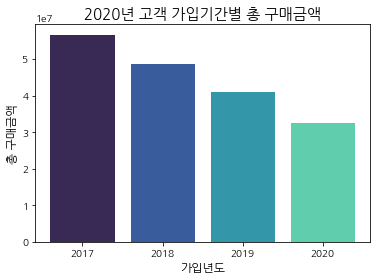

In [194]:
x = np.arange(4)
colors = sns.color_palette('mako',len(x))
years = ['2017', '2018', '2019', '2020']
values = [C15, C16, C17, C18]
plt.title('2020년 고객 가입기간별 총 구매금액', fontsize=15)
plt.xlabel('가입년도', fontsize=12)
plt.ylabel('총 구매금액', fontsize=12)
plt.bar(x, values, color = colors)
plt.xticks(x, years)
plt.show()



In [120]:
total_price = customer_download["total_price"]

In [121]:
customer_download.shape

(3277, 10)

In [123]:
customer_download["total_price"].sum()

178727500.0

(array([  40.,  215.,  507., 1020.,  561.,  398.,  375.,  101.,   48.,
          12.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

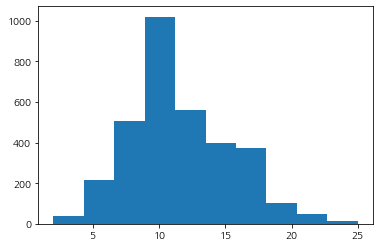

In [124]:
plt.hist(customer_download["download_count"])

- 10000 ~ 118900

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

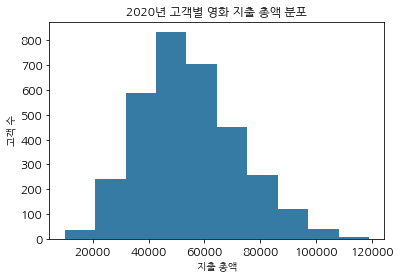

In [191]:
colors = sns.color_palette('mako', 1)
plt.hist(customer_download["total_price"], color=colors)
plt.title("2020년 고객별 영화 지출 총액 분포")
plt.xlabel("지출 총액")
plt.ylabel("고객 수")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [128]:
customer_download["total_price"].describe()

count      3277.000000
mean      54539.975587
std       17542.525369
min       10000.000000
25%       42200.000000
50%       52700.000000
75%       65700.000000
max      118900.000000
Name: total_price, dtype: float64

- 등급 만들기

In [104]:
conditionlist = [
    (customer_download['total_price'] <= 90000) ,
    (customer_download['total_price'] <= 150000) ,
    (customer_download['total_price'] <= 230000),
    (customer_download['total_price'] >= 230000)]
choicelist = ['Bronze', 'Silver', 'Gold', 'Platinum']
customer_download['class'] = np.select(conditionlist, choicelist, default='Not Specified')



In [105]:
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,82700.0,Bronze
1,C5002,M,22,20대,S,N,강남구,2015,23,26000.0,Bronze
2,C5003,F,33,30대,M,Y,서대문구,2015,55,69100.0,Bronze
3,C5004,F,24,20대,M,N,서대문구,2015,41,42500.0,Bronze
4,C5005,F,35,30대,M,N,마포구,2015,34,48200.0,Bronze


In [32]:
customer_download.to_csv("movie_custom_class")

### -------

### 사용자 총 구매금액

### 고객 구매 데이터 활용
    - 총 가격 구하기
    - 총 가격에 따른 등급 나누기 

In [64]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

In [65]:
movie_data = pd.merge(inventory_price, cust_down, on = "item_id")

In [66]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116464 entries, 0 to 116463
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_id            116464 non-null  object 
 1   contract_year      116464 non-null  int64  
 2   movie_id           116464 non-null  object 
 3   title              116464 non-null  object 
 4   price              116464 non-null  float64
 5   release_year       116464 non-null  int64  
 6   release_date       116464 non-null  object 
 7   runtime            116464 non-null  int64  
 8   mpa_rating         116464 non-null  object 
 9   mpa_rating_origin  116464 non-null  object 
 10  imdb_score         116464 non-null  float64
 11  votes              116464 non-null  int64  
 12  reviews_users      116464 non-null  int64  
 13  reviews_critics    116464 non-null  int64  
 14  budget             116464 non-null  int64  
 15  income_usa         116464 non-null  int64  
 16  in

In [67]:
p_count = movie_data.groupby(["customer_id"])["price"].sum()
price = pd.DataFrame(p_count)

In [68]:
customer_download = pd.merge(customer_count, price, on = "customer_id")
customer_download.rename(columns={"price":"total_price"}, inplace = True)

In [69]:
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0


In [70]:
total_price = customer_download["total_price"]

In [73]:
customer_download.shape

(3277, 10)

(array([401., 585., 576., 584., 357., 340., 198., 116.,  93.,  27.]),
 array([ 14700.,  58430., 102160., 145890., 189620., 233350., 277080.,
        320810., 364540., 408270., 452000.]),
 <BarContainer object of 10 artists>)

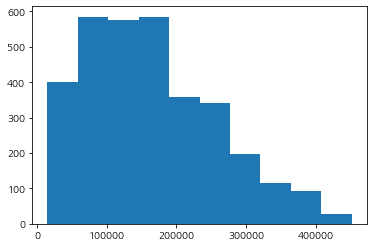

In [71]:
plt.hist(customer_download["total_price"])

- 14700 ~ 452000원까지 분포가 되어 있음

In [72]:
total_price.describe()

count      3277.000000
mean     165020.262435
std       93055.880442
min       14700.000000
25%       89500.000000
50%      150300.000000
75%      228000.000000
max      452000.000000
Name: total_price, dtype: float64

- 등급 만들기

In [30]:
conditionlist = [
    (customer_download['total_price'] <= 90000) ,
    (customer_download['total_price'] <= 150000) ,
    (customer_download['total_price'] <= 230000),
    (customer_download['total_price'] >= 230000)]
choicelist = ['Bronze', 'Silver', 'Gold', 'Platinum']
customer_download['class'] = np.select(conditionlist, choicelist, default='Not Specified')



In [31]:
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold


In [32]:
customer_download.to_csv("movie_custom_class")

###  영화 데이터 수입 데이터
- 수입이 있는 영화는 94개이다.
- 수입이 없는 영화는 12개이다.

In [33]:
count = pd.DataFrame(movie_data["title"].value_counts())

In [34]:
mp_count = movie_data.groupby(["title"])["price"].sum()
price = pd.DataFrame(mp_count)

In [35]:
price.rename(columns={"price":"total_price"}, inplace = True)

In [36]:
inventory_price.shape

(106, 31)

In [37]:
price.shape

(94, 1)

In [38]:
inv_pri_title = pd.merge(inventory_price, price, on = "title")

In [39]:
inv_pri_title

,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total_price
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,PG-13,...,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,3487000.0
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,PG-13,...,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,4032000.0
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,PG,...,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,3536500.0
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,PG-13,...,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,1474000.0
4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,PG-13,...,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,2564000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,I-1090,2018,tt1396484,It,4500.0,2017,09-08-2017,135,R,R,...,Horror,ETC,ETC,Jaeden Martell,Jeremy Ray Taylor,Sophia Lillis,2195,6,1,5584500.0
90,I-1091,2018,tt3501632,Thor: Ragnarok,5500.0,2017,11-03-2017,130,PG-13,PG-13,...,Action,Adventure,Comedy,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,2700,10,10,6781500.0
91,I-1092,2018,tt0974015,Justice League,4500.0,2017,11-17-2017,120,PG-13,PG-13,...,Action,Adventure,Fantasy,Ben Affleck,Henry Cavill,Amy Adams,2295,10,1,5521500.0
92,I-1093,2018,tt2380307,Coco,7200.0,2017,11-22-2017,105,PG,PG,...,Animation,Adventure,Family,Anthony Gonzalez,Gael Garc��a Bernal,Benjamin Bratt,2700,10,10,12657600.0


(array([13., 16., 17., 26., 11.,  4.,  2.,  1.,  2.,  2.]),
 array([  268000.,  2040700.,  3813400.,  5586100.,  7358800.,  9131500.,
        10904200., 12676900., 14449600., 16222300., 17995000.]),
 <BarContainer object of 10 artists>)

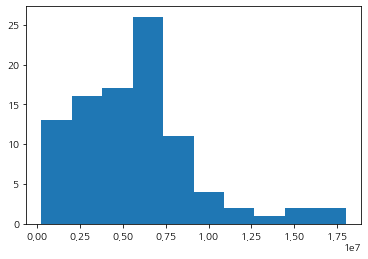

In [40]:
plt.hist(inv_pri_title["total_price"])

- 데이터 변경(원화 - 달러)

In [41]:
inv_pri_title["total_dollar"] = (inv_pri_title["total_price"] / 1136).round()

In [42]:
inv_pri_title

,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,...,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total_price,total_dollar
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,PG-13,...,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,3487000.0,3070.0
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,PG-13,...,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,4032000.0,3549.0
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,PG,...,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,3536500.0,3113.0
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,PG-13,...,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,1474000.0,1298.0
4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,PG-13,...,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,2564000.0,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,I-1090,2018,tt1396484,It,4500.0,2017,09-08-2017,135,R,R,...,ETC,ETC,Jaeden Martell,Jeremy Ray Taylor,Sophia Lillis,2195,6,1,5584500.0,4916.0
90,I-1091,2018,tt3501632,Thor: Ragnarok,5500.0,2017,11-03-2017,130,PG-13,PG-13,...,Adventure,Comedy,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,2700,10,10,6781500.0,5970.0
91,I-1092,2018,tt0974015,Justice League,4500.0,2017,11-17-2017,120,PG-13,PG-13,...,Adventure,Fantasy,Ben Affleck,Henry Cavill,Amy Adams,2295,10,1,5521500.0,4860.0
92,I-1093,2018,tt2380307,Coco,7200.0,2017,11-22-2017,105,PG,PG,...,Adventure,Family,Anthony Gonzalez,Gael Garc��a Bernal,Benjamin Bratt,2700,10,10,12657600.0,11142.0
